# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from cycler import cycler
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')


# cycle through colors then line styles
plt.rcParams["axes.prop_cycle"] = (
    cycler(linestyle=["-", "--", ":"]) * mpl.rcParamsDefault["axes.prop_cycle"]
)


In [3]:
QOLData=pd.read_csv("QOLResponses.csv")
Columns=QOLData.columns
QOLData = QOLData.assign(Research=QOLData['Research'].str.split(' / ')).explode('Research')
QOLData = QOLData.assign(Job=QOLData['Job'].str.split(', ')).explode('Job')
QOLData = QOLData.assign(Race=QOLData['Race'].str.split(' - ')).explode('Race')
QOLData.reset_index(drop=True,inplace=True)
for column in Columns:
    if QOLData[column].dtype=='object':
        QOLData[column]=QOLData[column].astype('category')

    

In [11]:
Demographics=['Program', 'Job', 'Research', 'Gender', 'LGBTQIA+', 'Race','Hispanic']
Variables=['Happy', 'Belong', 'Community', 'Degree Requirements', 'Breadth','CM Core Prep Comp', 'EM Core Prep Comp', 'QM1 Core Prep Comp',
        'QM2 Core Prep Comp', 'SM Core Prep Comp', 'CM Core Prep Research','EM Core Prep Research', 'QM1 Core Prep Research',
        'QM2 Core Prep Research', 'SM Core Prep Research', 'Financially Stable','Work Hours per Week', 'Adequate Health Time', 'Health Hours per Week',
        'Adequate Recreation Time', 'Recreation Hours per Week','Department Events', 'PGSA Events','Grad Seminar', 'Grad Astro Lab', 'Workload Impedence',
        'Undergrad Prep Concept', 'Undergrad Prep Math', 'Comp Fair', 'COMP Time Prep','Sleep','Mental Health Rate', 'Physical Health Rate', 'Downtime',
        'Monthly Income', 'Outside Support', 'Necessities percentage','Stipend Financially stable']

VariablesComps=['CM Core Prep Comp', 'EM Core Prep Comp', 'QM1 Core Prep Comp',
        'QM2 Core Prep Comp', 'SM Core Prep Comp', 'CM Core Prep Research','EM Core Prep Research', 'QM1 Core Prep Research',
        'QM2 Core Prep Research', 'SM Core Prep Research','Comp Fair', 'COMP Time Prep']
VariablesCourses=['Degree Requirements', 'Breadth','Grad Astro Lab', 'Workload Impedence','Undergrad Prep Concept', 'Undergrad Prep Math']
VariablesBelong=['Happy', 'Belong', 'Community','Department Events', 'PGSA Events']
VariablesFinances=['Financially Stable','Monthly Income', 'Outside Support', 'Necessities percentage','Stipend Financially stable']
VariablesHealth=['Work Hours per Week', 'Adequate Health Time', 'Health Hours per Week',
        'Adequate Recreation Time', 'Recreation Hours per Week','Sleep','Mental Health Rate', 'Physical Health Rate', 'Downtime']
Questions={'Happy':'I am happy in the department.', 'Belong':"I feel that I belong here.", 'Community':'The department provides an adequate sense of community.',
        'Degree Requirements':'I feel the requirements for my degree are reasonable.', 'Breadth':'I feel the breadth courses provide a wide variety of topics.',
        'CM Core Prep Comp':'The core courses adequately prepared me for taking the comps. CM',
        'EM Core Prep Comp':'The core courses adequately prepared me for taking the comps. EM', 
        'QM1 Core Prep Comp':'The core courses adequately prepared me for taking the comps. QM1',
        'QM2 Core Prep Comp':'The core courses adequately prepared me for taking the comps. QM2',
        'SM Core Prep Comp':'The core courses adequately prepared me for taking the comps. SM',
        'CM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research CM',
        'EM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research EM',
        'QM1 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 1',
        'QM2 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 2',
        'SM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research SM',
        'Financially Stable':'I feel financially stable.','Work Hours per Week':'How many hours per week you spend on activities related to your program',
        'Adequate Health Time':'I feel I have adequate time to spend on my mental and physical health.',
        'Health Hours per Week':'How many hours per week you spend on activities for your mental and physical health.',
        'Adequate Recreation Time':'I feel I have adequate time to spend on recreational activities.',
        'Recreation Hours per Week':'How many hours per week you spend on recreational activities.',
        'Department Events':'The department-wide events help me to connect with my peers and professors.',
        'PGSA Events':'The PGSA events help me to connect with my peers.',
        'Grad Seminar':'I feel the seminar courses help me become better at communicating science research.', 
        'Grad Astro Lab':'I feel the Graduate Lab/Astronomy Lab sufficiently taught me experimental/observational techniques and data analysis.',
        'Workload Impedence':'I feel the workload from my degree requirements impedes my ability to take courses more relevant to my research.',
        'Undergrad Prep Concept':'My undergraduate education prepared me for understanding and solving problems conceptually in graduate courses.',
        'Undergrad Prep Math':'My undergraduate education prepared me for understanding and solving problems mathematically in graduate courses.',
        'Comp Fair':'I feel the comprehensive exams are fair tests of the material from the core courses.', 
        'COMP Time Prep':'How much time do/did you spend on average preparing for each comprehensive exam?','Sleep':'How many hours a do you sleep at night?',
        'Mental Health Rate':'How would you rate your mental health?', 'Physical Health Rate':'How would you rate your physical health?', 
        'Downtime':'I feel there is enough downtime / breaks during the year.','Monthly Income':'How much do you make in monthly income',
        'Outside Support':'Do you hold any positions outside of the department to support yourself?', 
        'Necessities percentage':'What percentage of your income do you spend on necessities ',
        'Stipend Financially stable':'I feel my stipend alone is enough for me to be financially stable.'}
Programs=list(QOLData['Program'].values.unique())
Jobs=list(QOLData['Job'].values.unique())
ResearchAreas=list(QOLData['Research'].values.unique())
Genders=list(QOLData['Gender'].values.unique())
LGBT=list(QOLData['LGBTQIA+'].values.unique())
Races=list(QOLData['Race'].values.unique())
Hispanic=list(QOLData['Hispanic'].values.unique())
SubQOLData=pd.DataFrame({'QM2 Core Prep Research':QOLData["QM2 Core Prep Research"],'Mental Health Rate':QOLData['Mental Health Rate']})
print(QOLData['Necessities percentage'])

0       85.0
1        NaN
2      130.0
3       87.0
4        NaN
       ...  
119     60.0
120     55.0
121     75.0
122     75.0
123      NaN
Name: Necessities percentage, Length: 124, dtype: float64


In [5]:
def barplot(factor,column):
    if QOLData[column].dtype != 'category' and QOLData[factor].dtype == 'category':
        if factor=='Research' or factor =='Race':
            R=90
        else: 
            R=60
        ax=QOLData.groupby(factor)[column].agg('mean').sort_values().plot(kind='bar',grid=True,
            yerr=QOLData.groupby(factor)[column].agg('std'),capsize=10,title=f"{Questions[column]} {factor}",rot = R)
        fig=ax.get_figure()
        fig.set_size_inches(10,5)
        plt.show()
    for x in list(QOLData[factor].values.unique()):
        if column =='Monthly Income':
            R2=90
        else:
            R2=0
        try:
            ax=QOLData[QOLData[factor]==x][column].value_counts().sort_index().plot(kind='bar',title=f"{Questions[column]} {x}",grid=True,rot=R2)
        except IndexError:
            continue
        ax.get_figure()
        plt.show()
def barplot2(factor,column):
    if QOLData[column].dtype != 'category' and QOLData[factor].dtype == 'category':
        if factor=='Research' or factor =='Race':
            R=90
        else: 
            R=60
        ax=QOLData.groupby(factor)[column].agg('mean').sort_values().plot(kind='bar',grid=True,
            yerr=QOLData.groupby(factor)[column].agg('std'),capsize=10,title=f"{Questions[column]} {factor}",rot = R)
        fig=ax.get_figure()
        fig.set_size_inches(10,5)
        plt.show()

In [6]:
def histogram(column):
    ax=QOLData[column].value_counts().sort_index().plot(kind='bar',title=f"{Questions[column]}")
    ax.get_figure()
    plt.show()

# Melissa's Comps

## Comps are a fair test

In [55]:
QOLPreparation = QOLData.copy()

conditions = [
    (QOLData['Undergrad Prep Concept'].isin([1, 2]) | QOLData['Undergrad Prep Math'].isin([1, 2])),
    (QOLData['Undergrad Prep Concept'].isin([4, 5]) & QOLData['Undergrad Prep Math'].isin([4, 5]))
]

QOLPreparation['Preparation Level'] = np.select(conditions, ["Unprepared", "Prepared"], default="Partially Prepared")
QOLPreparation['Preparation Level'] = pd.Categorical(
    QOLPreparation['Preparation Level'],
    categories=['Prepared', 'Partially Prepared', 'Unprepared'],
    ordered=True
)
print(QOLPreparation["Preparation Level"].value_counts())

Preparation Level
Prepared              49
Unprepared            42
Partially Prepared    33
Name: count, dtype: int64


In [56]:
## same plot but by how many core/comp pairs they've taken
## there's also the "core classes prepared me well for the comps" questions

all_classes = ['SM', 'CM', 'QM', 'EM']

QOLPreparation['Cores/Comps Taken'] = 0

listed_cores = 'Please indicate which of the core courses and comprehensive exams have you already taken.'
for classes in all_classes:
    QOLPreparation[f'{classes} Core/Comp Taken'] = 0
    class_string = f"{classes} Course" if classes != 'QM' else "QM I"
    QOLPreparation.loc[
        QOLPreparation[listed_cores].str.contains(f"{classes} Comp", na=False) & \
        QOLPreparation[listed_cores].str.contains(class_string, na=False), "Cores/Comps Taken"
    ] += 1
    QOLPreparation.loc[
        QOLPreparation[listed_cores].str.contains(f"{classes} Comp", na=False) & \
        QOLPreparation[listed_cores].str.contains("QM I Course", na=False), f"{classes} Core/Comp Taken"
    ] = 1
    if classes == 'QM':
        QOLPreparation.loc[
            QOLPreparation[listed_cores].str.contains(f"{classes} Comp", na=False) & \
            QOLPreparation[listed_cores].str.contains("QM II Course", na=False), f"{classes} Core/Comp Taken"
        ] += 1

print(QOLPreparation['Cores/Comps Taken'].value_counts())

Cores/Comps Taken
4    46
0    33
1    18
3    18
2     9
Name: count, dtype: int64


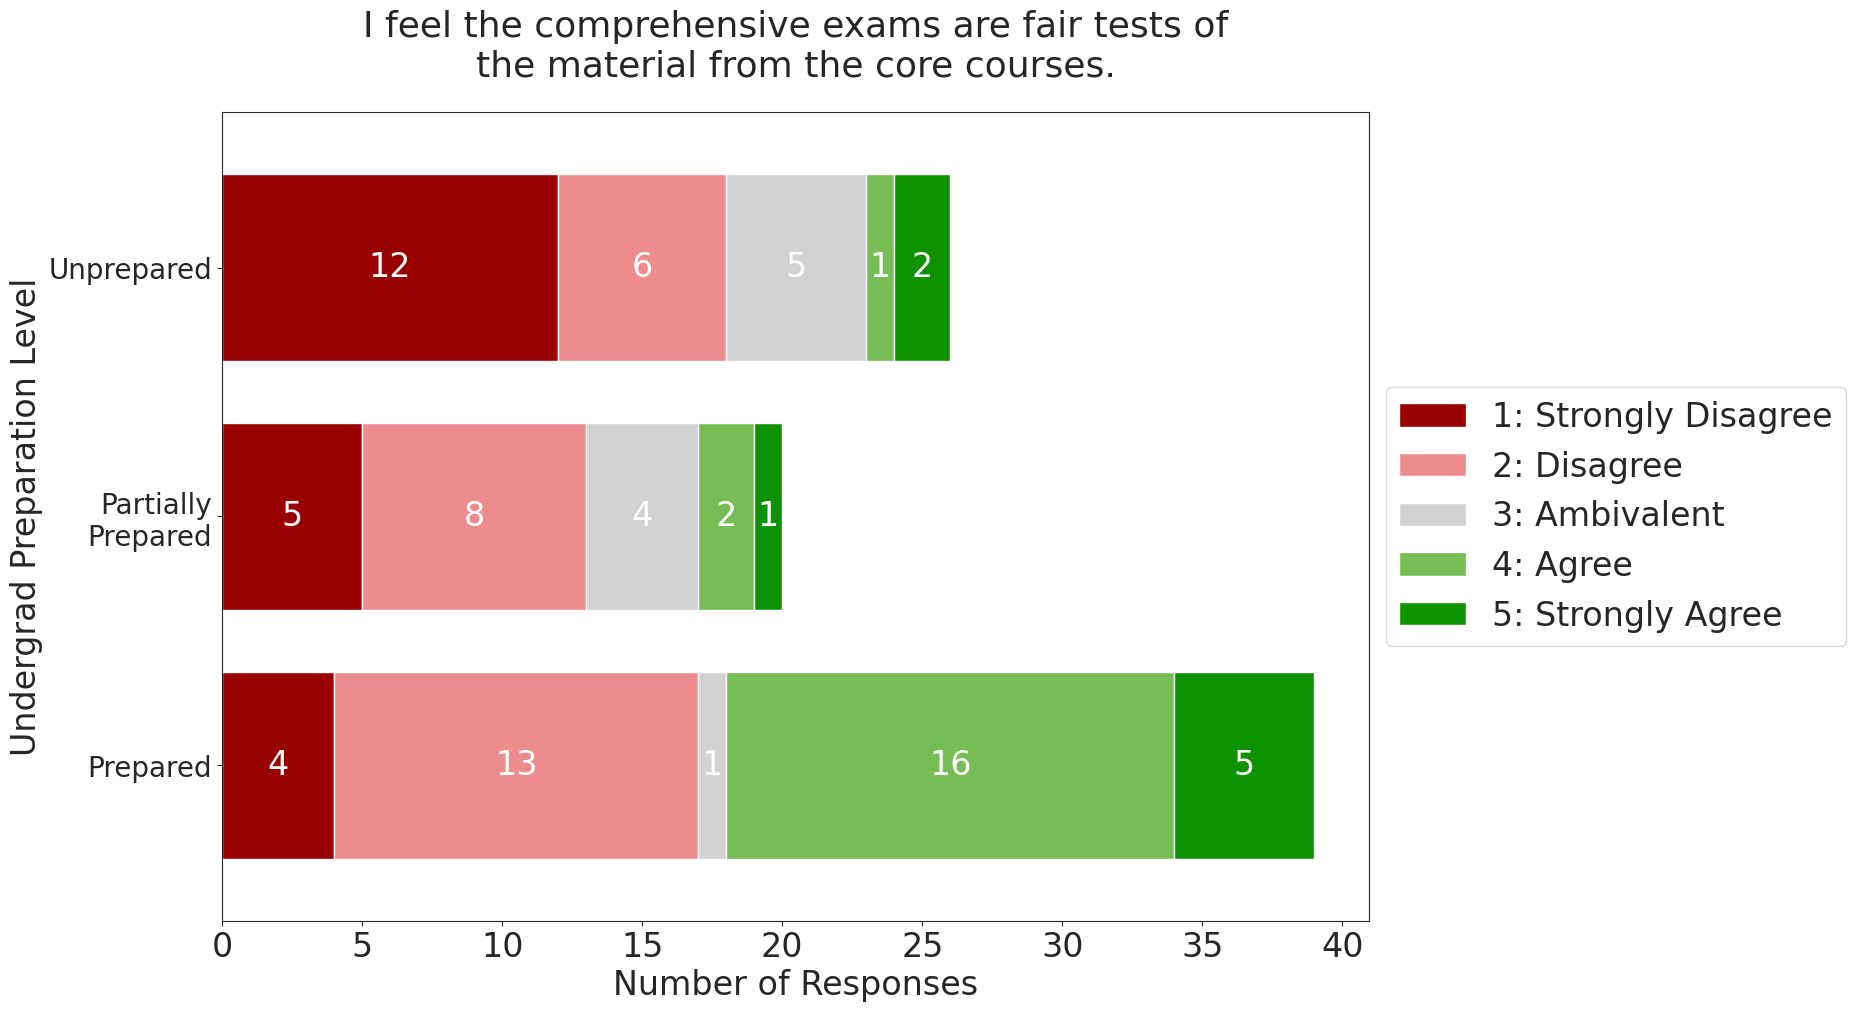

In [35]:
from textwrap import wrap

fontsize = 24

mapping = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Ambivalent",
    4: "Agree",
    5: "Strongly Agree"
}

counts = QOLPreparation[QOLPreparation["Cores/Comps Taken"] > 0].groupby('Preparation Level')['Comp Fair'].value_counts().unstack()

ax = counts.plot.barh(
    stacked=True,
    width=0.75,
    color=['#990000', '#ec8c8c', '#D2D2D2', '#76be53', '#0f9202']
)

## compare to knowledge level, knowledge difference
## could also do masters? but I'd interpret that biasedly no matter which way it went

labels = [l.get_text() for l in ax.get_yticklabels()]
labels = [ '\n'.join(wrap(l, 10)) for l in labels ]
ax.set_yticklabels(labels, fontsize=fontsize-4)

ax.tick_params(axis='x', labelsize=fontsize)
ax.set_xlabel('Number of Responses', fontsize=fontsize)
ax.set_ylabel("Undergrad Preparation Level", fontsize=fontsize)
ax.set_title(f"{'\n'.join(wrap(Questions['Comp Fair'], 50))}", fontsize=fontsize+2, pad=26)

fig = ax.get_figure()
fig.set_size_inches(18.5, 10.5)

for i, container in enumerate(ax.containers):
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x() + width / 2  # Position of the label on the x-axis (center of the bar)
        y = rect.get_y() + height / 2  # Position of the label on the y-axis (center of the bar)
        
        label = f"{int(width)}"
        
        # Add the annotation with the category and count
        ax.annotate(label, 
                    (x, y), 
                    ha="center", 
                    va="center", 
                    fontsize=fontsize, 
                    color="white")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
legend_labels = ax.get_legend_handles_labels()[1]
legend_labels = [f"{int(float(l))}: {mapping[int(float(l))]}" for l in legend_labels]
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize, labels=legend_labels)

plt.show()

More people were mathematically unprepared than conceptually.

Anyone who is unprepared thinks the comps exams are unfair.

Half the people who were prepared think the comps exams are unfair.

In [33]:
counts = QOLPreparation.groupby('Cores/Comps Taken')['Comp Fair'].value_counts().unstack()

ax = counts.plot.barh(
    stacked=True,
    width=0.75,
    color=['#990000', '#ec8c8c', '#D2D2D2', '#76be53', '#0f9202']
)

plt.clf()

<Figure size 640x480 with 0 Axes>

## Comps Knowledge Gain

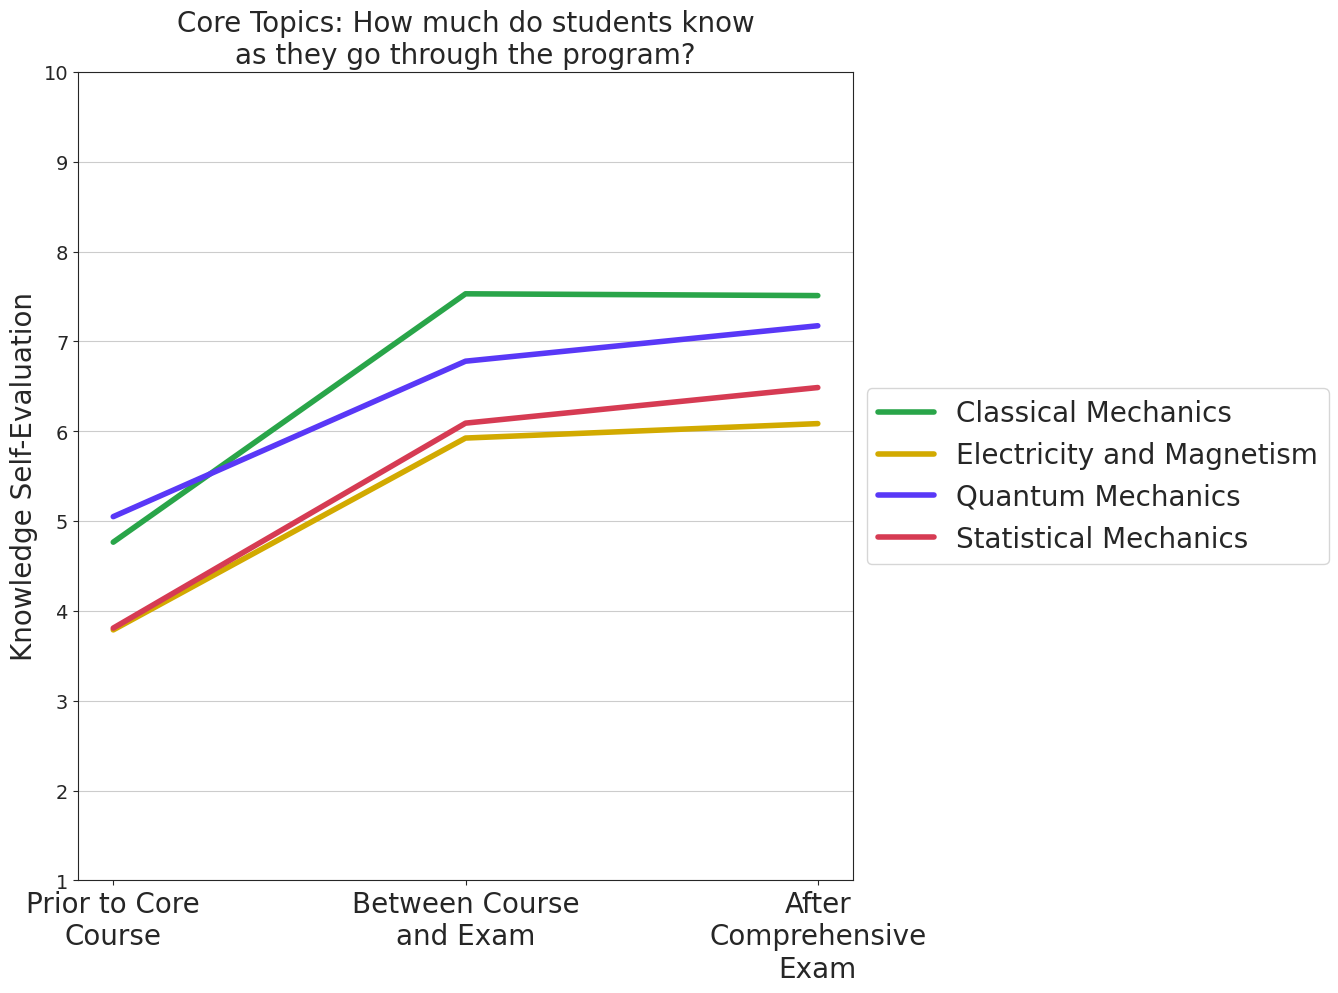

In [130]:
fontsize = 20
CM_color = '#29a549'
EM_color = '#d2aa00'
QM_color = '#5938f7'
SM_color = '#d63b53'

CM=QOLPreparation[QOLPreparation["CM Core/Comp Taken"] > 0][['Knowledge CM Start','Knowledge CM Core','Knowledge CM Comp']].agg('mean').transpose().reset_index(drop=True)
EM=QOLPreparation[QOLPreparation["EM Core/Comp Taken"] > 0][['Knowledge EM Start','Knowledge EM Core','Knowledge EM Comp']].agg('mean').transpose().reset_index(drop=True)
QM=QOLPreparation[QOLPreparation["QM Core/Comp Taken"] > 0][['Knowledge QM Start','Knowledge QM Core','Knowledge QM Comp']].agg('mean').transpose().reset_index(drop=True)
SM=QOLPreparation[QOLPreparation["SM Core/Comp Taken"] > 0][['Knowledge SM Start','Knowledge SM Core','Knowledge SM Comp']].agg('mean').transpose().reset_index(drop=True)
fig, ax = plt.subplots()
ax.plot(CM,label="Classical Mechanics",color=CM_color,lw=4)
ax.plot(EM,label="Electricity and Magnetism",color=EM_color,lw=4)
ax.plot(QM,label="Quantum Mechanics",color=QM_color,lw=4)
ax.plot(SM,label="Statistical Mechanics",color=SM_color,lw=4)
xticks = np.array([0,1,2])
xlabels = ['Prior to Core Course','Between Course and Exam','After Comprehensive Exam']
xlabels = [ '\n'.join(wrap(l, 14)) for l in xlabels ]
ax.set_xticks(xticks, labels=xlabels, fontsize=fontsize)
ax.set_ylim(1,10)
ax.yaxis.grid(True)
ax.set_title('\n'.join(wrap('Core Topics: How much do students know as they go through the program?', 38)), fontsize=fontsize)
ax.set_ylabel("Knowledge Self-Evaluation", fontsize=fontsize)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize-6)
fig.set_size_inches(12.5, 10.5)
plt.show()


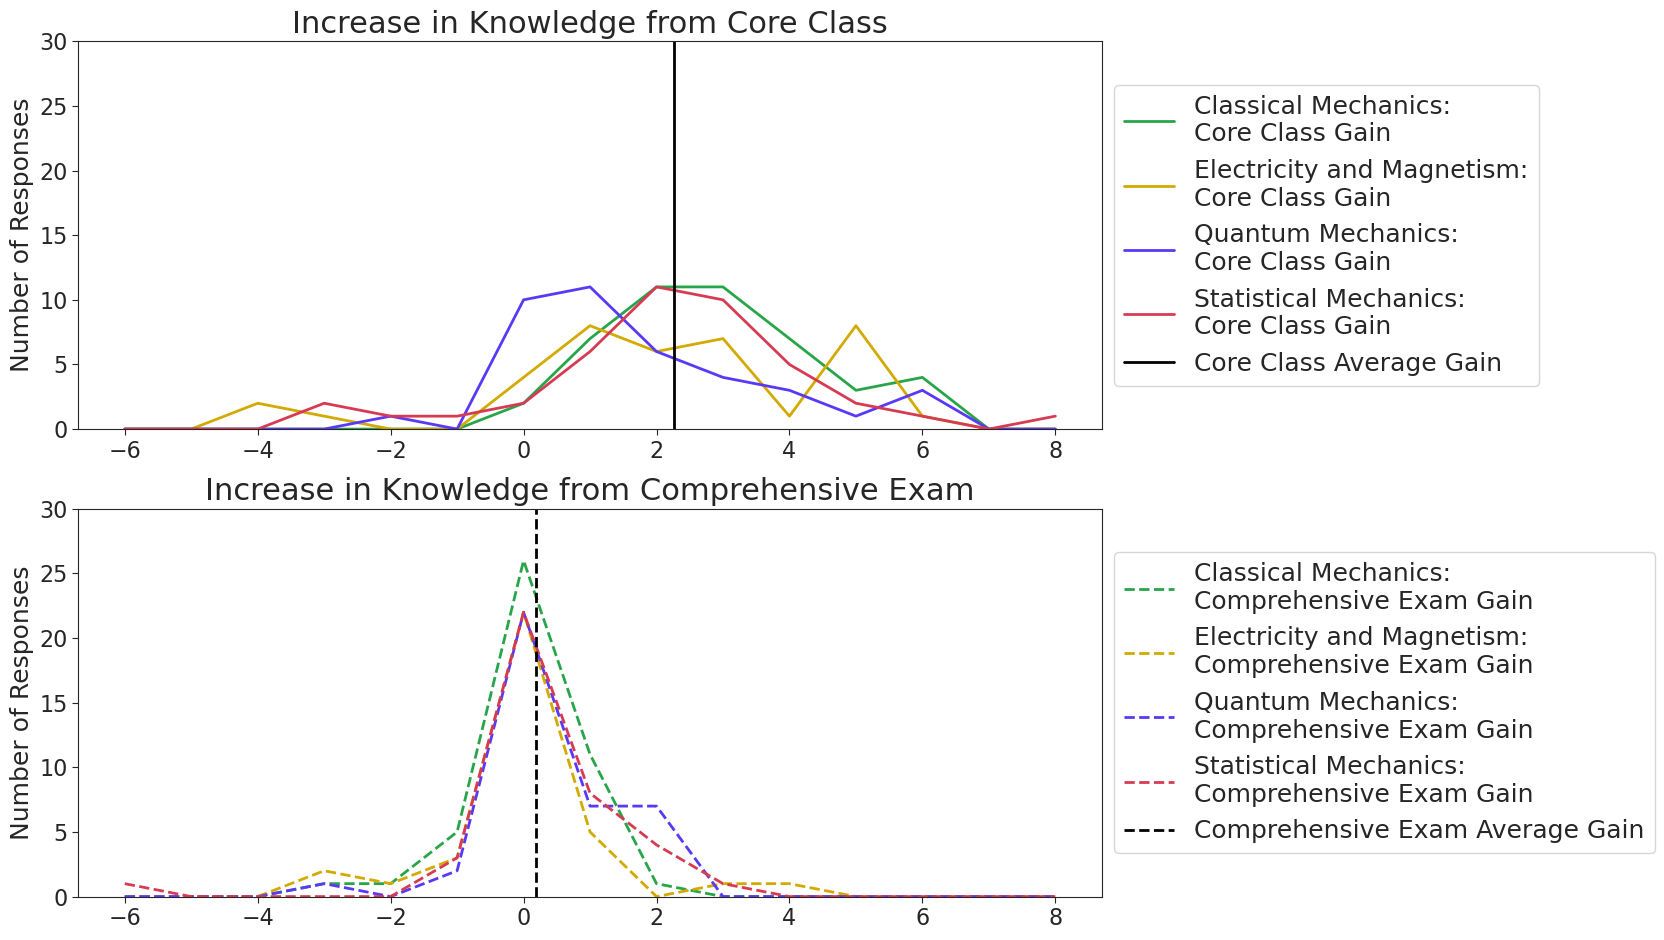

In [150]:
fontsize = 18

QOLPreparation['Difference Start Core CM']=QOLData['Knowledge CM Core']-QOLData['Knowledge CM Start']
QOLPreparation['Difference Start Core EM']=QOLData['Knowledge EM Core']-QOLData['Knowledge EM Start']
QOLPreparation['Difference Start Core QM']=QOLData['Knowledge QM Core']-QOLData['Knowledge QM Start']
QOLPreparation['Difference Start Core SM']=QOLData['Knowledge SM Core']-QOLData['Knowledge SM Start']
QOLPreparation['Difference Comp Core CM']=QOLData['Knowledge CM Comp']-QOLData['Knowledge CM Core']
QOLPreparation['Difference Comp Core EM']=QOLData['Knowledge EM Comp']-QOLData['Knowledge EM Core']
QOLPreparation['Difference Comp Core QM']=QOLData['Knowledge QM Comp']-QOLData['Knowledge QM Core']
QOLPreparation['Difference Comp Core SM']=QOLData['Knowledge SM Comp']-QOLData['Knowledge SM Core']

class_sum = 0
class_count = 0
comp_sum = 0
comp_count = 0
for classes in ['CM', 'EM', 'QM', 'SM']:
    class_sum += QOLPreparation[f'Difference Start Core {classes}'][QOLPreparation[f"{classes} Core/Comp Taken"] > 0].sum()
    comp_sum += QOLPreparation[f'Difference Comp Core {classes}'][QOLPreparation[f"{classes} Core/Comp Taken"] > 0].sum()
    class_count += QOLPreparation[f'Difference Start Core {classes}'][QOLPreparation[f"{classes} Core/Comp Taken"] > 0].count()
    comp_count += QOLPreparation[f'Difference Comp Core {classes}'][QOLPreparation[f"{classes} Core/Comp Taken"] > 0].count()
class_avg = float(class_sum) / class_count
comp_avg = float(comp_sum) / comp_count

fig, ax = plt.subplots(2, 1)
indices = [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
QOLPreparation['Difference Start Core CM'][QOLPreparation["CM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', lw=2, color=CM_color, label='Classical Mechanics:\nCore Class Gain')
QOLPreparation['Difference Comp Core CM'][QOLPreparation["CM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[1], kind='line', lw=2, color=CM_color, style='--', label='Classical Mechanics:\nComprehensive Exam Gain')
QOLPreparation['Difference Start Core EM'][QOLPreparation["EM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', lw=2, color=EM_color, label='Electricity and Magnetism:\nCore Class Gain')
QOLPreparation['Difference Comp Core EM'][QOLPreparation["EM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[1], kind='line', lw=2, color=EM_color, style='--', label='Electricity and Magnetism:\nComprehensive Exam Gain')
QOLPreparation['Difference Start Core QM'][QOLPreparation["QM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', lw=2, color=QM_color, label='Quantum Mechanics:\nCore Class Gain')
QOLPreparation['Difference Comp Core QM'][QOLPreparation["QM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[1], kind='line', lw=2, color=QM_color, style='--', label='Quantum Mechanics:\nComprehensive Exam Gain')
QOLPreparation['Difference Start Core SM'][QOLPreparation["SM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', lw=2, color=SM_color, label='Statistical Mechanics:\nCore Class Gain')
QOLPreparation['Difference Comp Core SM'][QOLPreparation["SM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[1], kind='line', lw=2, color=SM_color, style='--', label='Statistical Mechanics:\nComprehensive Exam Gain')
#QOLPreparation['Difference Start Core QM'].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', color='#000000', label='original')
#QOLPreparation['Difference Start Core QM'][QOLPreparation["QM Core/Comp Taken"] > 0].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', color=QM_color, label='took one course')
#QOLPreparation['Difference Start Core QM'][QOLPreparation["QM Core/Comp Taken"] > 1].value_counts().sort_index().reindex(indices, fill_value=0).plot(ax=ax[0], kind='line', color='r', label='took both courses')

ax[0].axvline(x=class_avg, color='black', linestyle='-', lw=2, label='Core Class Average Gain')
ax[1].axvline(x=comp_avg, color='black', linestyle='--', lw=2, label='Comprehensive Exam Average Gain')

for axis in ax:
    axis.set_ylim(0,30)
    box = axis.get_position()
    axis.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    axis.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
    axis.set_xlabel('')
    axis.set_ylabel('Number of Responses', fontsize=fontsize)
    axis.tick_params(axis='both', labelsize=fontsize-2, length=4)
fig.set_size_inches(14.5, 9.5)
ax[0].set_title('Increase in Knowledge from Core Class', fontsize=fontsize+4)
ax[1].set_title('Increase in Knowledge from Comprehensive Exam', fontsize=fontsize+4)

plt.tight_layout()
plt.show()


## Cost of Comps

16.766493921405367
Average Hours Studied 92.2
Average Cost per RA 1573.6906250000002
Total Cost 153722.2
{'Research Assistant or Graduate Assistant': 'red', 'Other': 'blue', 'Not Paid': 'cyan', 'Teaching Assistant': 'pink'}


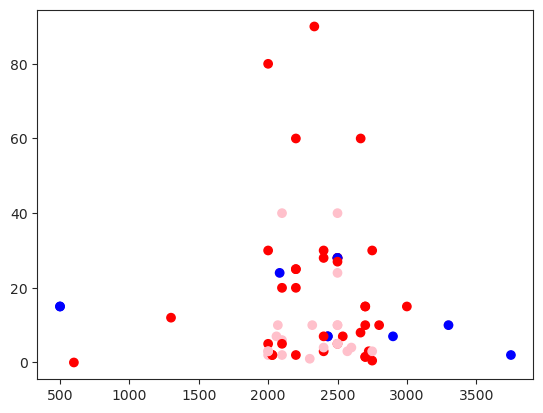

In [186]:
b = list(QOLData['Job'].values.unique())
colors = {b[0]: 'red', b[1]: 'blue', b[2]: 'cyan', b[3]: 'pink'}

QOLData["Cost of Comps"] = (QOLData["COMP Time Prep"][QOLData["COMP Time Prep"]<50]+0.5)*QOLData['Monthly Income']/20
QOLData["Cost of Comps"][QOLData["COMP Time Prep"]>=50] = (QOLData["COMP Time Prep"][QOLData["COMP Time Prep"]>=50]/8+0.5)*QOLData['Monthly Income']/20 # assume outliers meant to divide by 8

print(QOLData["COMP Time Prep"].agg('std'))

print('Average Hours Studied', QOLData["COMP Time Prep"][QOLData["COMP Time Prep"]<50].agg('mean')*8)
print('Average Cost per RA', QOLData['Cost of Comps'][QOLData['Job']==b[0]].agg('mean'))
masters_ra = QOLData['Cost of Comps'][QOLData['Job']==b[0]][QOLData['Program']=='Masters Degree'].sum()
phd_ra = QOLData['Cost of Comps'][QOLData['Job']==b[0]][QOLData['Program']=='PhD Student'].sum()
print('Total Cost', (masters_ra+phd_ra)*2*2) # 2 comps per year, survey sampled ~1/2 of department

plt.scatter(QOLData['Monthly Income'], QOLData["COMP Time Prep"], c=QOLData['Job'].map(colors))
print(colors)
plt.show()

# Melissa's Work-Life Balance

## Demographic counts

In [53]:
print(QOLData.groupby('Research').size())
print()
print(QOLData.groupby('Program').size())
print()
print(QOLData.groupby('Hispanic').size())
print()
print(QOLData.groupby('Race').size())
print()
print(QOLData.groupby('Gender').size())
print()
print(QOLData.groupby('LGBTQIA+').size())

Research
Accelerator and Beam Physics                               3
Astronomy                                                 26
Atomic, Molecular and Optical (AMO) Physics               17
Biological Physics                                         2
Condensed Matter - Experiment                              2
Condensed Matter - Theory                                  8
Formal Theory                                             11
High Energy Physics - Hadron Collider Group                4
High Energy Physics - Neutrino and Nucleon Decay Group     7
I am not currently involved in research                    8
Nuclear Experiment                                        13
Nuclear Theory                                             4
Phenomenology                                              9
Prefer not to answer                                       4
Quantum Information Science and Technology                 6
dtype: int64

Program
Masters Degree    27
PhD Candidate     26
PhD Student 

Demographic breakdowns that are large enough for statistical analysis: masters vs phd student vs candidate, white vs asian vs native/black/latinx, (cis/trans) woman vs (cis/trans) man, LGBTQIA+ vs not.

If you collapse racial categories, first compare the minorities to the US population representation and to the state population representation.

## Mental and Physical health ratings

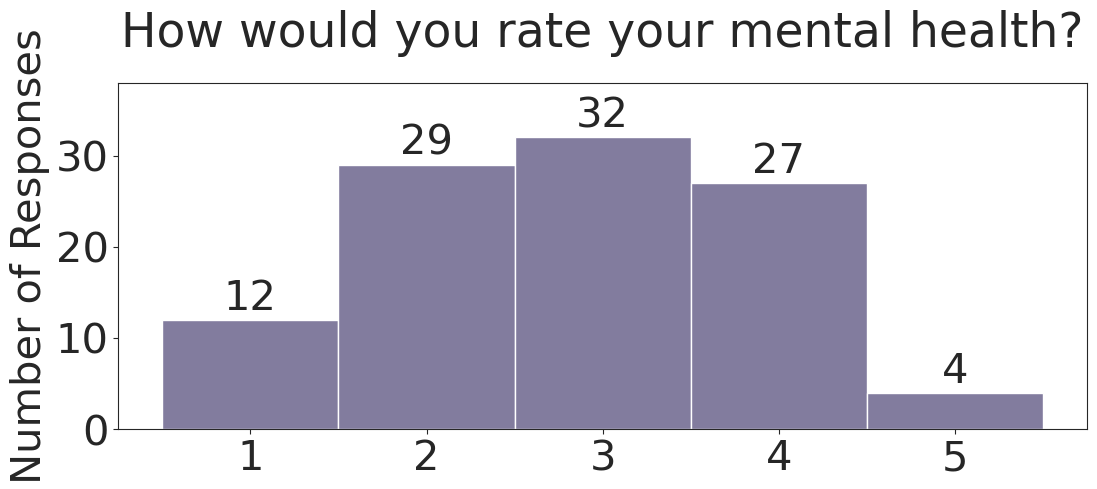

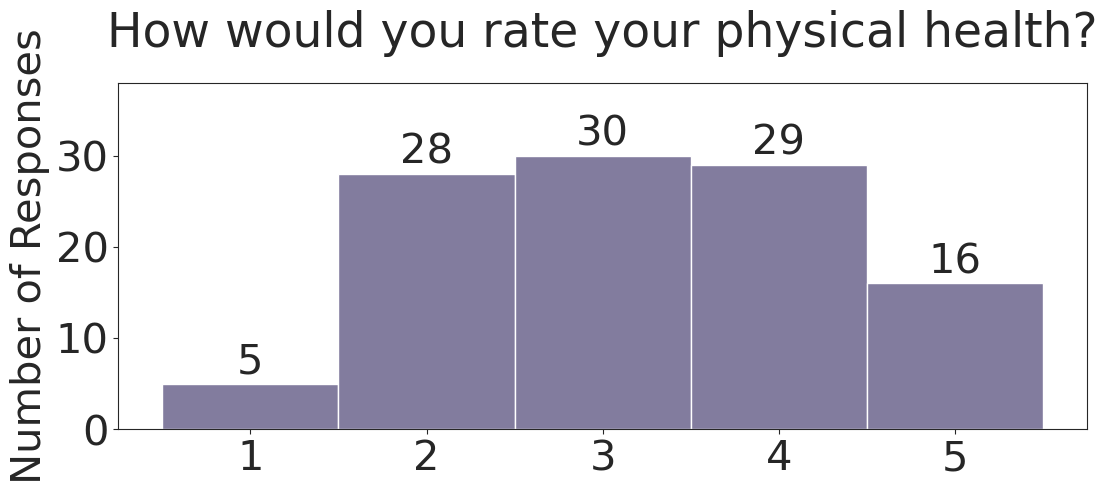

In [27]:
for column in ['Mental Health Rate', 'Physical Health Rate']:
    fontsize = 30

    counts = QOLData[column].value_counts().astype(int)
    counts.index = counts.index.astype(int)

    ax = counts.sort_index().plot.bar(
        rot=0,
        color='#827c9e',
        width=1
    )

    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_xlabel('')
    ax.set_ylabel("Number of Responses", fontsize=fontsize)
    ax.set_title(f"{Questions[column]}", fontsize=fontsize+4, pad=26)
    ax.set_ylim(0, 38)

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 1
        label = "{:.0f}".format(y_value)
        ax.annotate(label, 
                    (x_value, y_value), 
                    fontsize=fontsize,
                    xytext=(0, space), 
                    textcoords="offset points", 
                    ha='center', va='bottom')

    fig = ax.get_figure()
    fig.set_size_inches(12.5, 4.5)
    plt.show()

In [28]:
for column in ['Mental Health Rate', 'Physical Health Rate']:
    avgs = QOLData.groupby('Research')[[column]].agg('mean').sort_values(by=column)
    print(avgs)

                                                    Mental Health Rate
Research                                                              
High Energy Physics - Hadron Collider Group                   2.000000
I am not currently involved in research                       2.250000
Nuclear Experiment                                            2.250000
Condensed Matter - Theory                                     2.285714
Accelerator and Beam Physics                                  2.666667
Quantum Information Science and Technology                    2.666667
Atomic, Molecular and Optical (AMO) Physics                   2.923077
High Energy Physics - Neutrino and Nucleon Deca...            3.000000
Phenomenology                                                 3.000000
Astronomy                                                     3.043478
Formal Theory                                                 3.222222
Condensed Matter - Experiment                                 3.500000
Nuclea

## Enough time, agree or disagree

                          Strongly Disagree  Disagree  Ambivalent  Agree  \
Adequate Recreation Time                 29        41          24     22   
Adequate Health Time                     24        35          27     29   
Downtime                                 23        32          22     18   

                          Strongly Agree  
Adequate Recreation Time               8  
Adequate Health Time                   9  
Downtime                              12  


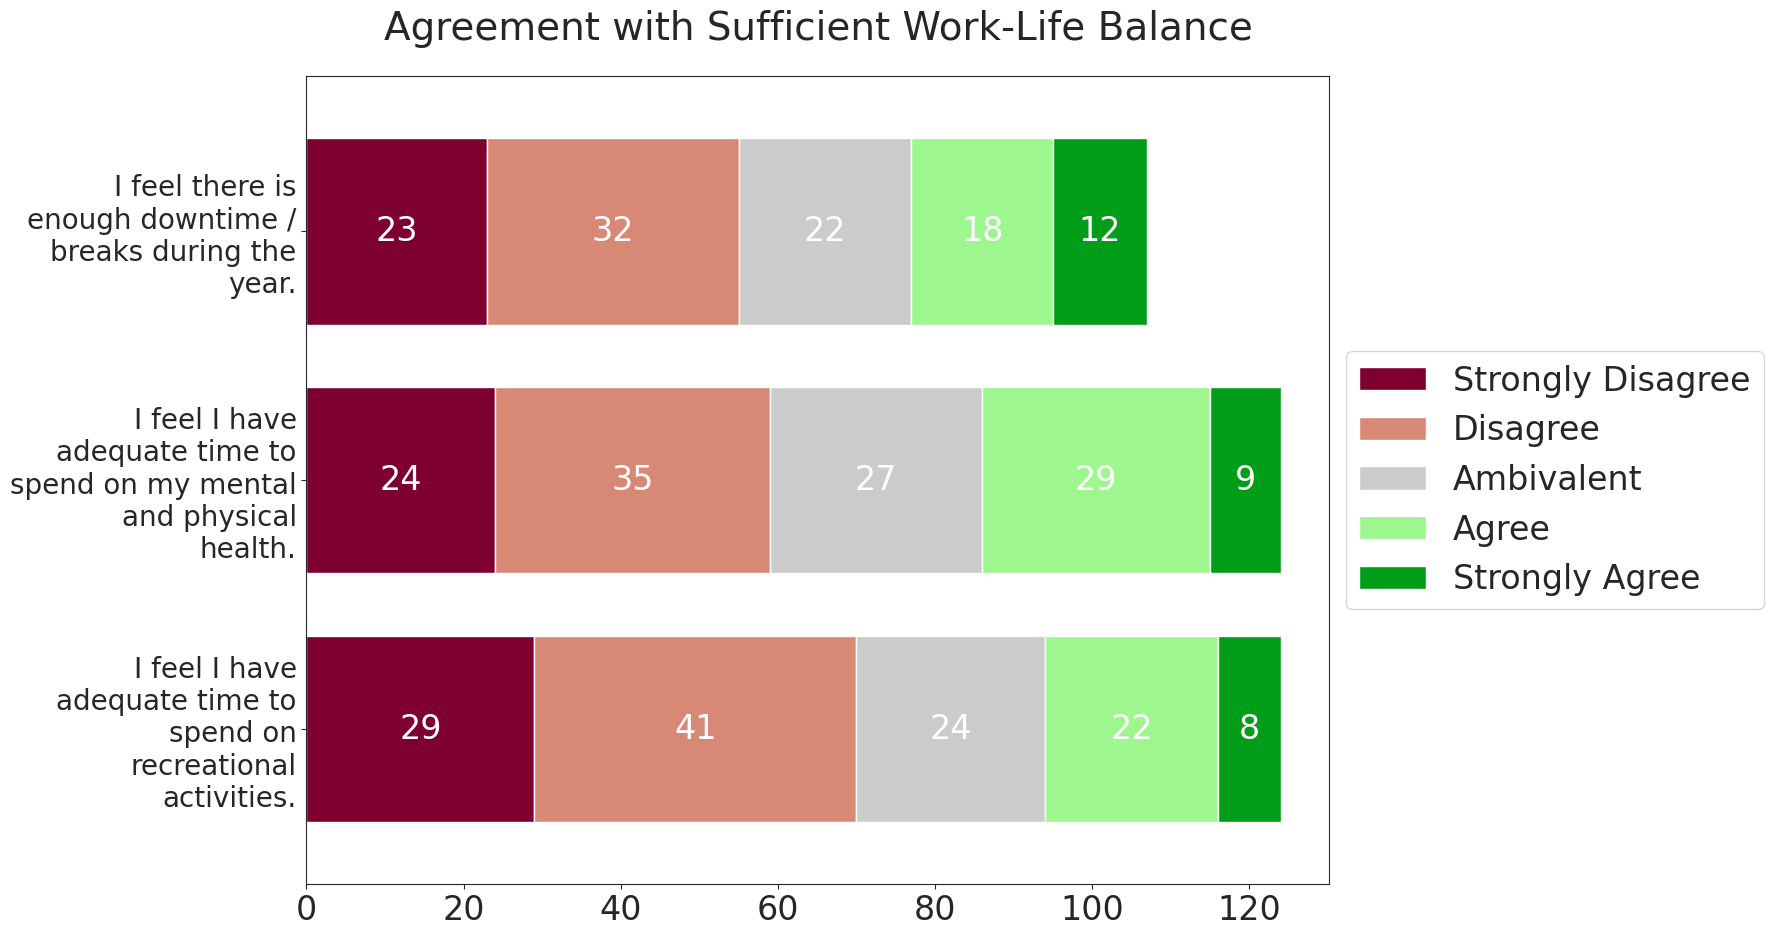

In [17]:
from textwrap import wrap

fontsize = 24

mapping = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Ambivalent",
    4: "Agree",
    5: "Strongly Agree"
}

all_counts = {}
columns = ['Adequate Recreation Time', 'Adequate Health Time', 'Downtime']
for column in columns:
    counts = QOLData[column].value_counts()
    all_counts[column] = counts.groupby(counts.index.map(mapping)).sum()

collapsed = pd.DataFrame(all_counts)
collapsed = collapsed.T.reindex(["Strongly Disagree", "Disagree", "Ambivalent", "Agree", "Strongly Agree"], axis=1)

print(collapsed)
ax = collapsed.plot.barh(
    stacked=True,
    width=0.75,
    color=["#7d0030", "#d88976", "#cbcbcb", "#9ef68f", "#009d19"]
)

for i, container in enumerate(ax.containers):
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x() + width / 2  # Position of the label on the x-axis (center of the bar)
        y = rect.get_y() + height / 2  # Position of the label on the y-axis (center of the bar)
        
        category = collapsed.columns[i]
        label = f"{int(width)}"
        
        # Add the annotation with the category and count
        ax.annotate(label, 
                    (x, y), 
                    ha="center", 
                    va="center", 
                    fontsize=fontsize, 
                    color="white")

labels = [l.get_text() for l in ax.get_yticklabels()]
labels = [ '\n'.join(wrap(Questions[l], 18)) for l in labels ]
ax.set_yticklabels(labels, fontsize=fontsize-4)

fig = ax.get_figure()
fig.set_size_inches(16.5, 10.5)

ax.get_legend().remove()
ax.set_title("Agreement with Sufficient Work-Life Balance", fontsize=fontsize+4, pad=26)
ax.tick_params(axis='x', labelsize=fontsize)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
plt.show()

## Hours per Week

In [ ]:
fontsize = 24

columns = ['Work Hours per Week', 'Health Hours per Week', 'Recreation Hours per Week']
medians = QOLData.groupby('Research')[columns].agg('median')


ax = medians.plot.barh(
    stacked=True,
    width=1,
    color=['#000000', '#00d95a', '#4554ef']
)

labels = [l.get_text() for l in ax.get_yticklabels()]
labels = [ '\n'.join(wrap(l, 32)) for l in labels ]
ax.set_yticklabels(labels, fontsize=16)

fig = ax.get_figure()
fig.set_size_inches(12.5, 14.5)

ax.axvline(x=40, color='red', linestyle='--', label='40 Hours')

labels = ax.get_legend_handles_labels()[1]
labels = [ '\n'.join(wrap(l.replace('Hours per Week', ''), 14)) for l in labels ]
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize, labels=labels)

ax.set_xlabel('Hours Spent Per Week', fontsize=fontsize)
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=fontsize)
ax.set_title('Median hours spent on work, health, and recreation, by research group', fontsize=fontsize, pad=20)

plt.gca().invert_yaxis()
plt.show()

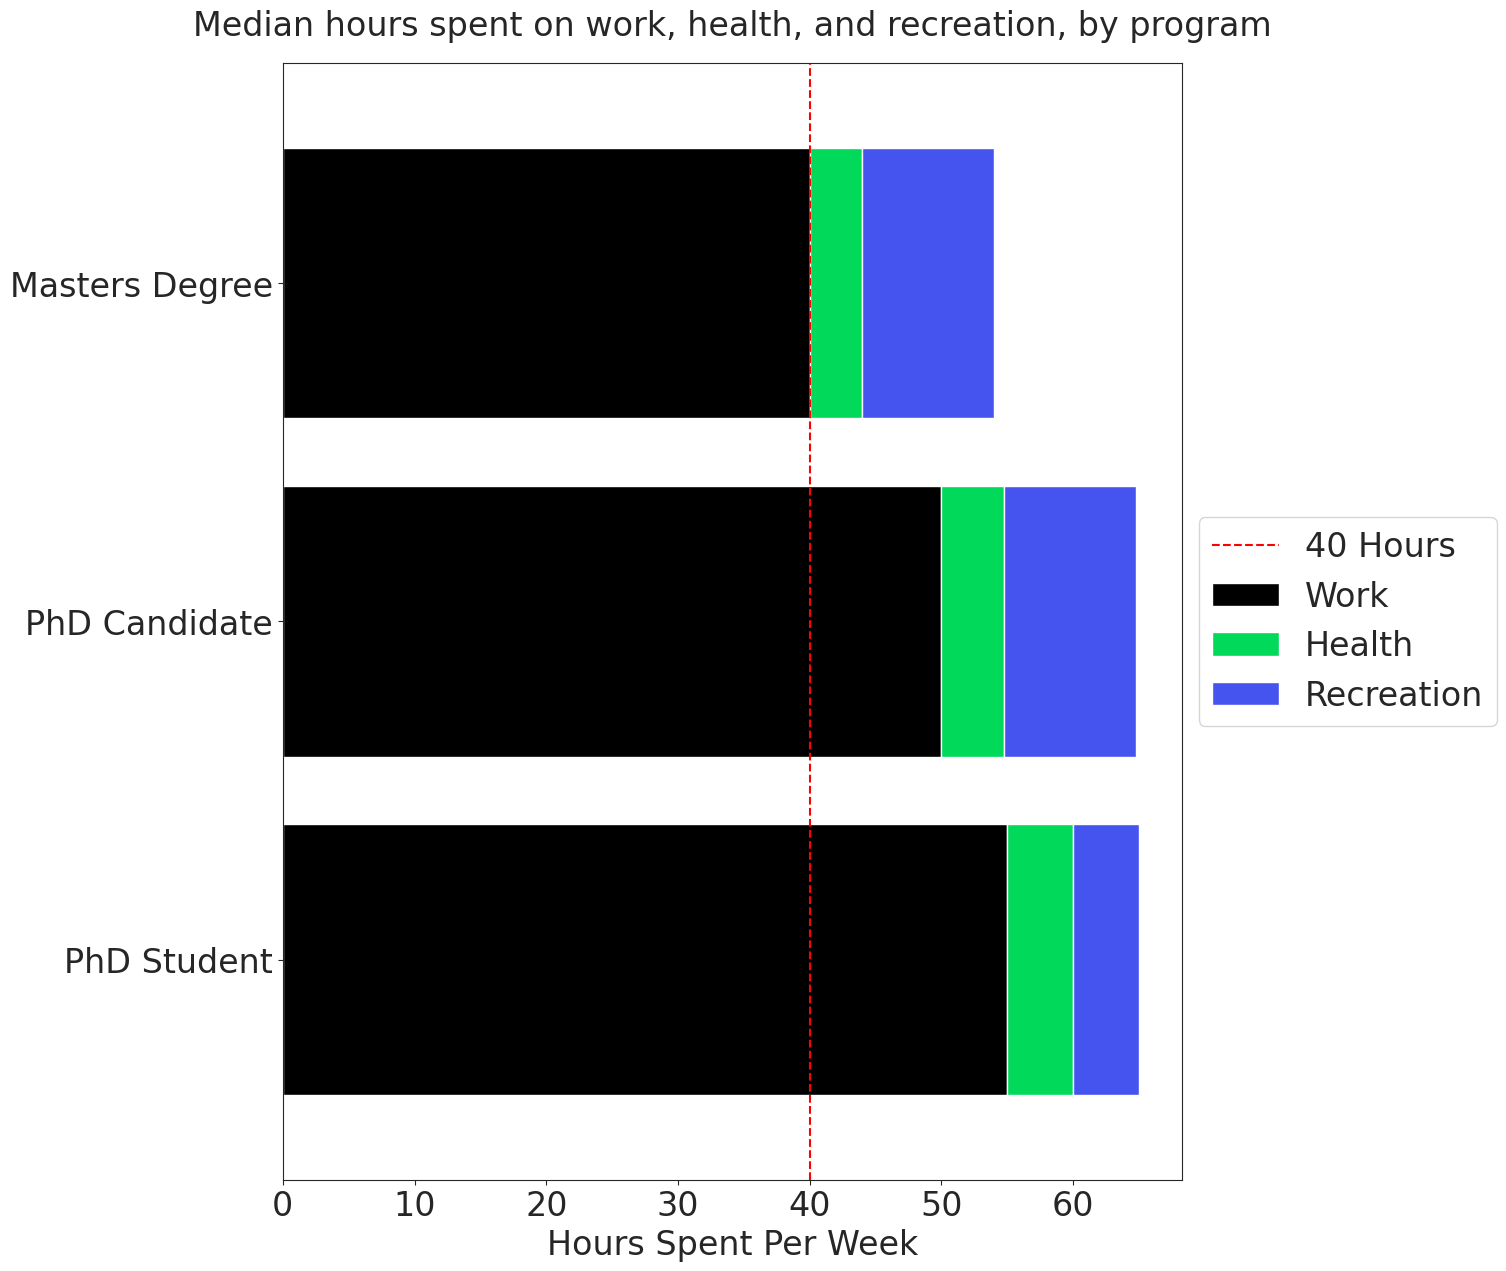

In [20]:
from textwrap import wrap

fontsize = 24

columns = ['Work Hours per Week', 'Health Hours per Week', 'Recreation Hours per Week']
medians = QOLData.groupby('Program')[columns].agg('median')


ax = medians.plot.barh(
    stacked=True,
    width=0.8,
    color=['#000000', '#00d95a', '#4554ef']
)

labels = [l.get_text() for l in ax.get_yticklabels()]
labels = [ '\n'.join(wrap(l, 32)) for l in labels ]
ax.set_yticklabels(labels, fontsize=16)

fig = ax.get_figure()
fig.set_size_inches(14.5, 14.5)

ax.axvline(x=40, color='red', linestyle='--', label='40 Hours')

labels = ax.get_legend_handles_labels()[1]
labels = [ '\n'.join(wrap(l.replace('Hours per Week', ''), 14)) for l in labels ]
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize, labels=labels)

ax.set_xlabel('Hours Spent Per Week', fontsize=fontsize)
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_title('Median hours spent on work, health, and recreation, by program', fontsize=fontsize, pad=20)

plt.gca().invert_yaxis()
plt.show()

# Melissa's Financial stability

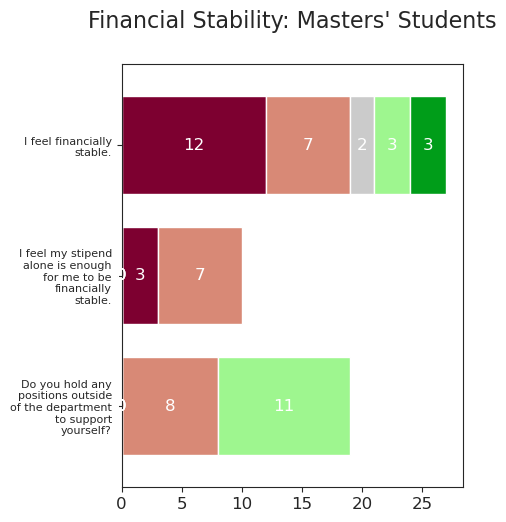

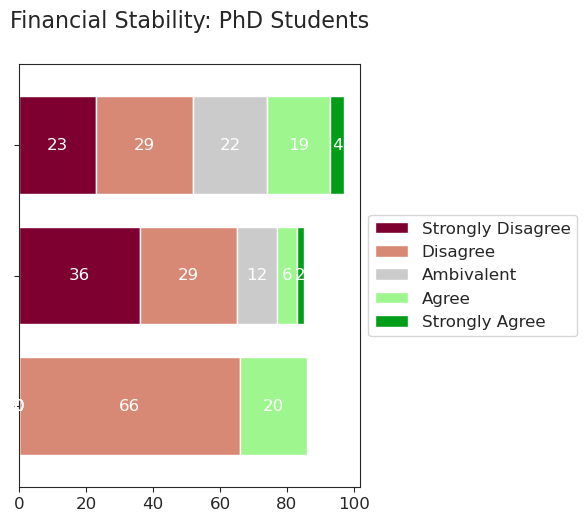

In [60]:
from textwrap import wrap

fontsize = 12

mapping = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Ambivalent",
    4: "Agree",
    5: "Strongly Agree"
}

masters = True
for this_data in [ QOLData[QOLData['Program']=='Masters Degree'] , QOLData[QOLData['Program']!='Masters Degree'] ]:
    all_counts = {}
    columns = ['Financially Stable', 'Stipend Financially stable']
    yes_no_column = 'Outside Support'

    for column in columns:
        counts = this_data[column].value_counts()
        all_counts[column] = counts.groupby(counts.index.map(mapping)).sum()

    yes_no_counts = this_data[yes_no_column].value_counts()
    all_counts[yes_no_column] = yes_no_counts.groupby(yes_no_counts.index.map({True:'Agree',False:'Disagree'})).sum()

    collapsed = pd.DataFrame(all_counts)
    collapsed = collapsed.T.reindex(["Strongly Disagree", "Disagree", "Ambivalent", "Agree", "Strongly Agree"], axis=1)

    ax = collapsed.plot.barh(
        align='center',
        stacked=True,
        width=0.75,
        color=["#7d0030", "#d88976", "#cbcbcb", "#9ef68f", "#009d19"]
    )

    for i, container in enumerate(ax.containers):
        for rect in container:
            width = rect.get_width()
            height = rect.get_height()
            x = rect.get_x() + width / 2  # Position of the label on the x-axis (center of the bar)
            y = rect.get_y() + height / 2  # Position of the label on the y-axis (center of the bar)
            
            category = collapsed.columns[i]
            label = f"{int(width)}"
            
            # Add the annotation with the category and count
            ax.annotate(label, 
                        (x, y), 
                        ha="center", 
                        va="center", 
                        fontsize=fontsize, 
                        color="white")

    labels = [l.get_text() for l in ax.get_yticklabels()]
    labels = [ '\n'.join(wrap(Questions[l], 18)) for l in labels ]
    if masters:
        ax.set_yticklabels(labels, fontsize=fontsize-4)
    else:
        ax.set_yticklabels([])

    fig = ax.get_figure()
    fig.set_size_inches(5.5, 5.5)

    ax.get_legend().remove()
    ax.set_title(f"Financial Stability: {'Masters\'' if masters else 'PhD'} Students", fontsize=fontsize+4, pad=26)
    ax.tick_params(axis='x', labelsize=fontsize)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    if not masters:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
    plt.gca().invert_yaxis()
    plt.show()

    masters = False

In [43]:
import scipy.stats as st

masters = True
for this_data in [ QOLData[QOLData['Program']=='Masters Degree'] , QOLData[QOLData['Program']!='Masters Degree'] ]:
    column = this_data['Necessities percentage'].clip(0,100)
    print(column.agg('mean'))
    print(column.agg('std'))
    print(st.norm.interval(0.68, loc=np.mean(column), scale=np.std(column)) )

    masters = False

74.73333333333333
24.978466917002926
(50.73558123590402, 98.73108543076266)
76.45679012345678
12.902566975912242
(63.70518072900087, 89.2083995179127)


# Melissa's Program Requirements

In [49]:
column_dict = {
    'Degree Requirements':'I feel the requirements for my degree are reasonable',
	'Grad Seminar':'I feel the seminar courses help me become better at communicating science research.',
	'Grad Astro Lab':'I feel the Graduate Lab/Astronomy Lab sufficiently taught me experimental/observational techniques and data analysis.',

	'CM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research CM',
 	'SM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research SM',    
  	'EM Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research EM',
   	'QM1 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 1',
   	'QM2 Core Prep Research':'The material I learned in the core courses (as it was taught to me) is applicable to my research QM 2',
   	'Workload Impedence':'I feel the workload from my degree requirements impedes my ability to take courses more relevant to my research.'
}


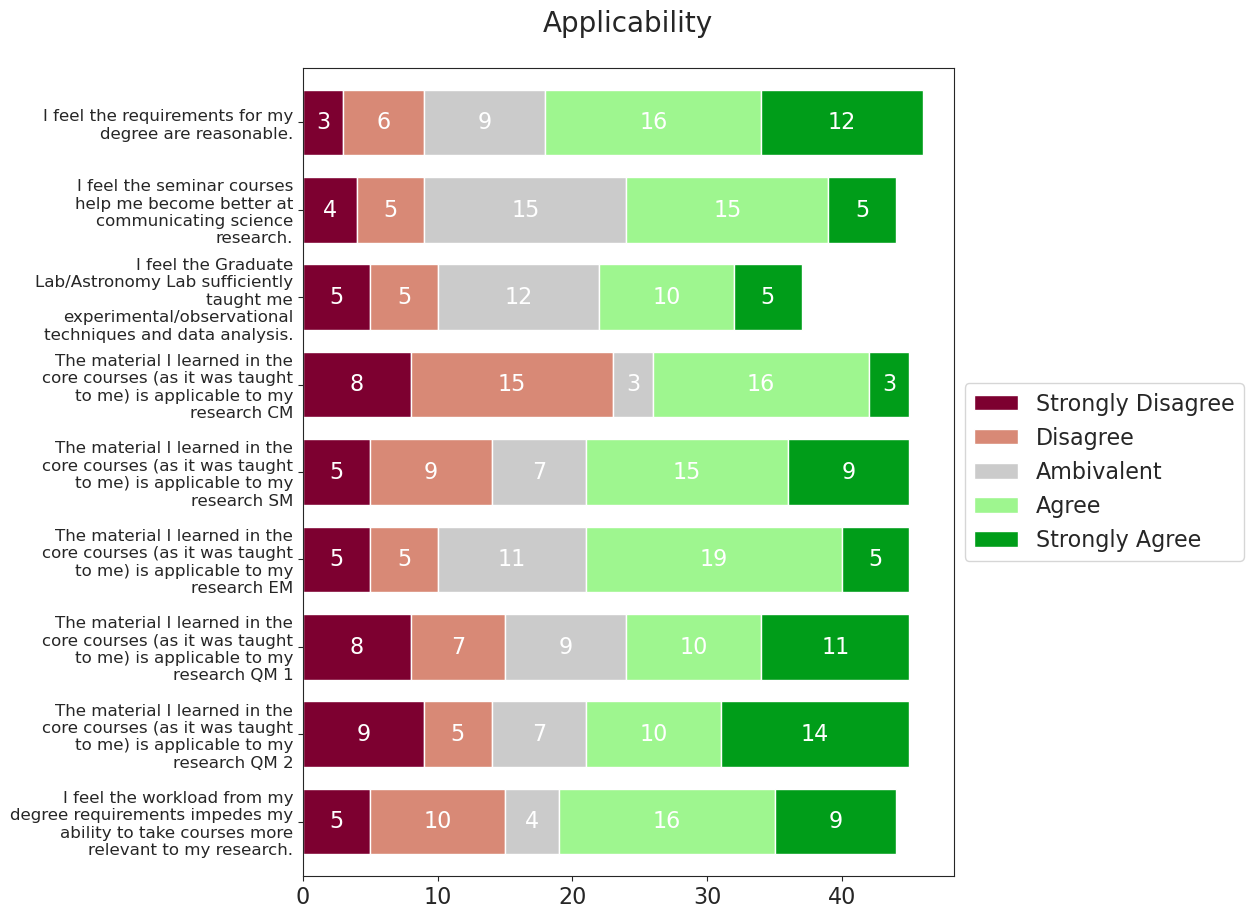

In [57]:
from textwrap import wrap

fontsize = 16

mapping = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Ambivalent",
    4: "Agree",
    5: "Strongly Agree"
}

all_counts = {}
columns = column_dict.keys()
this_data = QOLPreparation[QOLPreparation['Cores/Comps Taken']>3]

for column in columns:
    counts = this_data[column].value_counts()
    all_counts[column] = counts.groupby(counts.index.map(mapping)).sum()

collapsed = pd.DataFrame(all_counts)
collapsed = collapsed.T.reindex(["Strongly Disagree", "Disagree", "Ambivalent", "Agree", "Strongly Agree"], axis=1)

ax = collapsed.plot.barh(
    stacked=True,
    width=0.75,
    color=["#7d0030", "#d88976", "#cbcbcb", "#9ef68f", "#009d19"]
)

for i, container in enumerate(ax.containers):
    for rect in container:
        width = rect.get_width()
        height = rect.get_height()
        x = rect.get_x() + width / 2  # Position of the label on the x-axis (center of the bar)
        y = rect.get_y() + height / 2  # Position of the label on the y-axis (center of the bar)
            
        category = collapsed.columns[i]
        label = f"{int(width)}"
            
        # Add the annotation with the category and count
        ax.annotate(label, 
                    (x, y), 
                    ha="center", 
                    va="center", 
                    fontsize=fontsize, 
                    color="white")

labels = [l.get_text() for l in ax.get_yticklabels()]
labels = [ '\n'.join(wrap(Questions[l], 30)) for l in labels ]
ax.set_yticklabels(labels, fontsize=fontsize-4)

fig = ax.get_figure()
fig.set_size_inches(10.5, 10.5)

ax.get_legend().remove()
ax.set_title(f"Applicability", fontsize=fontsize+4, pad=26)
ax.tick_params(axis='x', labelsize=fontsize)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
plt.gca().invert_yaxis()
plt.show()

# Comps

In [ ]:
ax=QOLData.groupby('Research')[['Knowledge CM Start','Knowledge CM Core','Knowledge CM Comp']].agg('mean').transpose().plot(kind='line',legend=False,grid=True,rot=30)
ax.set_aspect(0.24)
fig=ax.get_figure()
fig.set_size_inches(14,4.5)
fig.legend(loc='outside center right',bbox_to_anchor=(1, 0.5))
plt.show()
#for x in ResearchAreas:
    #ax=QOLData[QOLData['Research']==x][['Knowledge CM Start','Knowledge CM Core','Knowledge CM Comp']].transpose().plot(kind='line',title=f"{x}",grid=True,legend=False,rot=30)
    #ax.get_figure()
    #plt.show()
ax=QOLData.groupby('Research')[['Knowledge EM Start','Knowledge EM Core','Knowledge EM Comp']].agg('mean').transpose().plot(kind='line',legend=False,grid=True,rot=30)
ax.set_aspect(0.24)
fig=ax.get_figure()
fig.set_size_inches(14,4.5)
fig.legend(loc='outside center right',bbox_to_anchor=(1, 0.5))
plt.show()
#for x in ResearchAreas:
    #ax=QOLData[QOLData['Research']==x][['Knowledge EM Start','Knowledge EM Core','Knowledge EM Comp']].transpose().plot(kind='line',title=f"{x}",grid=True,legend=False,rot=30)
    #ax.get_figure()
    #plt.show()
ax=QOLData.groupby('Research')[['Knowledge QM Start','Knowledge QM Core','Knowledge QM Comp']].agg('mean').transpose().plot(kind='line',legend=False,grid=True,rot=30)
ax.set_aspect(0.24)
fig=ax.get_figure()
fig.set_size_inches(14,4.5)
fig.legend(loc='outside center right',bbox_to_anchor=(1, 0.5))
plt.show()
#for x in ResearchAreas:
    #ax=QOLData[QOLData['Research']==x][['Knowledge QM Start','Knowledge QM Core','Knowledge QM Comp']].transpose().plot(kind='line',title=f"{x}",grid=True,legend=False,rot=30)
    #ax.get_figure()
    #plt.show()
ax=QOLData.groupby('Research')[['Knowledge SM Start','Knowledge SM Core','Knowledge SM Comp']].agg('mean').transpose().plot(kind='line',legend=False,grid=True,rot=30)
ax.set_aspect(0.24)
fig=ax.get_figure()
fig.set_size_inches(14,4.5)
fig.legend(loc='outside center right',bbox_to_anchor=(1, 0.5))
plt.show()
#for x in ResearchAreas:
    #ax=QOLData[QOLData['Research']==x][['Knowledge SM Start','Knowledge SM Core','Knowledge SM Comp']].transpose().plot(kind='line',title=f"{x}",rot = 30,grid=True,legend=False)
    #ax.get_figure()
    #plt.show()

In [ ]:
CM=QOLData[['Knowledge CM Start','Knowledge CM Core','Knowledge CM Comp']].agg('mean').transpose().reset_index(drop=True)

EM=QOLData[['Knowledge EM Start','Knowledge EM Core','Knowledge EM Comp']].agg('mean').transpose().reset_index(drop=True)

QM=QOLData[['Knowledge QM Start','Knowledge QM Core','Knowledge QM Comp']].agg('mean').transpose().reset_index(drop=True)
SM=QOLData[['Knowledge SM Start','Knowledge SM Core','Knowledge SM Comp']].agg('mean').transpose().reset_index(drop=True)
fig, ax = plt.subplots()
ax.plot(CM,label="CM")
ax.plot(EM,label="EM")
ax.plot(QM,label="QM")
ax.plot(SM,label="SM")
xticks = np.array([0,1,2])
xlabels = ["Start Program",'After Core Course','After Comp']
ax.set_xticks(xticks, labels=xlabels)
ax.set_ylabel("Knowledge Self-evaluation")
ax.legend()
plt.show()


In [ ]:
total=[]
total.append(list(CM.values))
total.append(list(EM.values))
total.append(list(QM.values))
total.append(list(SM.values))
total=np.array(total)
diff_tot=[]
diff_tot.append(list(total[:,1]-total[:,0]))
diff_tot.append(list(total[:,2]-total[:,1]))
diff_tot=np.array(diff_tot)
v=diff_tot.mean(axis=1)
er=diff_tot.std(axis=1)

fig, ax = plt.subplots()
xticks = np.array([0,1])
ax.bar(xticks,v,label="mean",yerr=er,capsize=10)
xlabels = ["Difference Start-Core",'Difference Comp-Core']
ax.set_xticks(xticks, labels=xlabels)
ax.set_ylabel("Knowledge Self-evaluation")
ax.legend()
plt.show()

In [ ]:
QOLData['Difference Start Core CM']=QOLData['Knowledge CM Core']-QOLData['Knowledge CM Start']
QOLData['Difference Start Core EM']=QOLData['Knowledge EM Core']-QOLData['Knowledge EM Start']
QOLData['Difference Start Core QM']=QOLData['Knowledge QM Core']-QOLData['Knowledge QM Start']
QOLData['Difference Start Core SM']=QOLData['Knowledge SM Core']-QOLData['Knowledge SM Start']
QOLData['Difference Comp Core CM']=QOLData['Knowledge CM Comp']-QOLData['Knowledge CM Core']
QOLData['Difference Comp Core EM']=QOLData['Knowledge EM Comp']-QOLData['Knowledge EM Core']
QOLData['Difference Comp Core QM']=QOLData['Knowledge QM Comp']-QOLData['Knowledge QM Core']
QOLData['Difference Comp Core SM']=QOLData['Knowledge SM Comp']-QOLData['Knowledge SM Core']

ax=QOLData['Difference Start Core CM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Comp Core CM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Start Core EM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Comp Core EM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Start Core QM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Comp Core QM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Start Core SM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData['Difference Comp Core SM'].value_counts().sort_index().plot(kind='bar')
fig=ax.get_figure()
plt.show()
ax=QOLData[['Difference Start Core CM','Difference Comp Core CM']].agg('mean').plot(kind='bar',
        yerr=QOLData[['Difference Start Core CM','Difference Comp Core CM']].agg('std'),capsize=10,rot = 45)
fig=ax.get_figure()
plt.show()
ax=QOLData[['Difference Start Core EM','Difference Comp Core EM']].agg('mean').plot(kind='bar',
        yerr=QOLData[['Difference Start Core EM','Difference Comp Core EM']].agg('std'),capsize=10,rot = 45)
fig=ax.get_figure()
plt.show()
ax=QOLData[['Difference Start Core QM','Difference Comp Core QM']].agg('mean').plot(kind='bar',
        yerr=QOLData[['Difference Start Core QM','Difference Comp Core QM']].agg('std'),capsize=10,rot = 45)
fig=ax.get_figure()
plt.show()
ax=QOLData[['Difference Start Core SM','Difference Comp Core SM']].agg('mean').plot(kind='bar',
        yerr=QOLData[['Difference Start Core SM','Difference Comp Core SM']].agg('std'),capsize=10,rot = 45)
fig=ax.get_figure()
plt.show()


In [ ]:
QOLData["Cost of Comps"]= QOLData['Monthly Income']*QOLData["COMP Time Prep"]/20
b=list(QOLData['Job'].values.unique())
print(b)
A=QOLData[QOLData['Job']==b[0]]
val=A.groupby('Research')['Cost of Comps'].agg('mean').sort_values().dropna().plot(kind='bar',grid=True,
            yerr=QOLData.groupby('Research')['Monthly Income'].agg('std'),capsize=10,title="Average Cost of Comps for research assistants, {'Research'}")
A[["Cost of Comps",'Monthly Income',"COMP Time Prep"]].agg("mean")

# Health

In [ ]:
barplot("Research","Adequate Health Time")

In [ ]:
SubQOLData=pd.DataFrame({'Mental Health Rate':QOLData['Mental Health Rate'],'Adequate Health Time':QOLData['Adequate Health Time']})
ax=sns.pairplot(SubQOLData,kind='reg',diag_kind='hist',plot_kws={'scatter_kws':{'alpha':0.1}})

# Pay

In [ ]:
A=QOLData[QOLData['Job']==b[0]]
val=A.groupby('Research')['Monthly Income'].agg('mean').sort_values().dropna().plot(kind='bar',grid=True,
            yerr=QOLData.groupby('Research')['Monthly Income'].agg('std'),capsize=10,title=f"{Questions['Monthly Income']}, {'Research'}")
print(val)


# All Histograms

In [ ]:
for var in Variables:
    histogram(var)
    plt.show()

# Correlations

## All Correlation with Finances

In [ ]:
for var1 in VariablesFinances:
        for var2 in Variables:
                try:
                        SubQOLData=pd.DataFrame({var1:QOLData[var1],var2:QOLData[var2]})
                        if np.abs(SubQOLData.corr()[var1].values[1])>0.25:
                                ax=sns.pairplot(SubQOLData,kind='reg',diag_kind='hist',plot_kws={'scatter_kws':{'alpha':0.1}})
                                plt.show()
                except:
                        continue

## All Correlation with Belonging

In [ ]:
for var1 in VariablesBelong:
        for var2 in Variables:
                try:
                        SubQOLData=pd.DataFrame({var1:QOLData[var1],var2:QOLData[var2]})
                        if np.abs(SubQOLData.corr()[var1].values[1])>0.25:
                                ax=sns.pairplot(SubQOLData,kind='reg',diag_kind='hist',plot_kws={'scatter_kws':{'alpha':0.1}})
                                plt.show()
                except:
                        continue

## All Correlation with Comps

In [ ]:
for var1 in VariablesComps:
        for var2 in Variables:
                try:
                        SubQOLData=pd.DataFrame({var1:QOLData[var1],var2:QOLData[var2]})
                        if np.abs(SubQOLData.corr()[var1].values[1])>0.25:
                                ax=sns.pairplot(SubQOLData,kind='reg',diag_kind='hist',plot_kws={'scatter_kws':{'alpha':0.1}})
                                plt.show()
                except:
                        continue

## All Correlation with Courses

In [ ]:
for var1 in VariablesCourses:
        for var2 in Variables:
                try:
                        SubQOLData=pd.DataFrame({var1:QOLData[var1],var2:QOLData[var2]})
                        if np.abs(SubQOLData.corr()[var1].values[1])>0.25:
                                ax=sns.pairplot(SubQOLData,kind='reg',diag_kind='hist',plot_kws={'scatter_kws':{'alpha':0.1}})
                                plt.show()
                except:
                        continue

## All Correlation with Health

In [ ]:
for var1 in VariablesHealth:
        for var2 in Variables:
                try:
                        SubQOLData=pd.DataFrame({var1:QOLData[var1],var2:QOLData[var2]})
                        if np.abs(SubQOLData.corr()[var1].values[1])>0.25:
                                ax=sns.pairplot(SubQOLData,kind='reg',diag_kind='hist',plot_kws={'scatter_kws':{'alpha':0.1}})
                                plt.show()
                except:
                        continue

# Demographics

## Finances by Demographics

In [ ]:
for var in VariablesFinances:
    for dem in Demographics:
        barplot(dem,var)

## Belonging by Demographics

In [ ]:
for var in VariablesBelong:
    for dem in Demographics:
        barplot(dem,var)

## Health by Demographics

In [ ]:
for var in VariablesHealth:
    for dem in Demographics:
        barplot(dem,var)

## Comps by Demographics

In [ ]:
for var in VariablesComps:
    for dem in Demographics:
        barplot2(dem,var)

## Courses by Demographics

In [ ]:
for var in VariablesCourses:
    for dem in Demographics:
        barplot(dem,var)